In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Explorando dados**

In [ ]:
credit = pd.read_csv('drive/MyDrive/Colab Notebooks/credit_customers.csv')
credit.shape

(1000, 21)

In [ ]:
credit.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [ ]:
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
credit.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
credit.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
categ = credit.select_dtypes(exclude=[np.number])
categ.head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad


In [ ]:
categ_col = categ.columns
categ_col

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
for c in categ_col:
  print(credit[c].unique())

['<0' '0<=X<200' 'no checking' '>=200']
['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
['none' 'guarantor' 'co applicant']
['real estate' 'life insurance' 'no known property' 'car']
['none' 'bank' 'stores']
['own' 'for free' 'rent']
['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
['yes' 'none']
['yes' 'no']
['good' 'bad']


**Visualização das features**

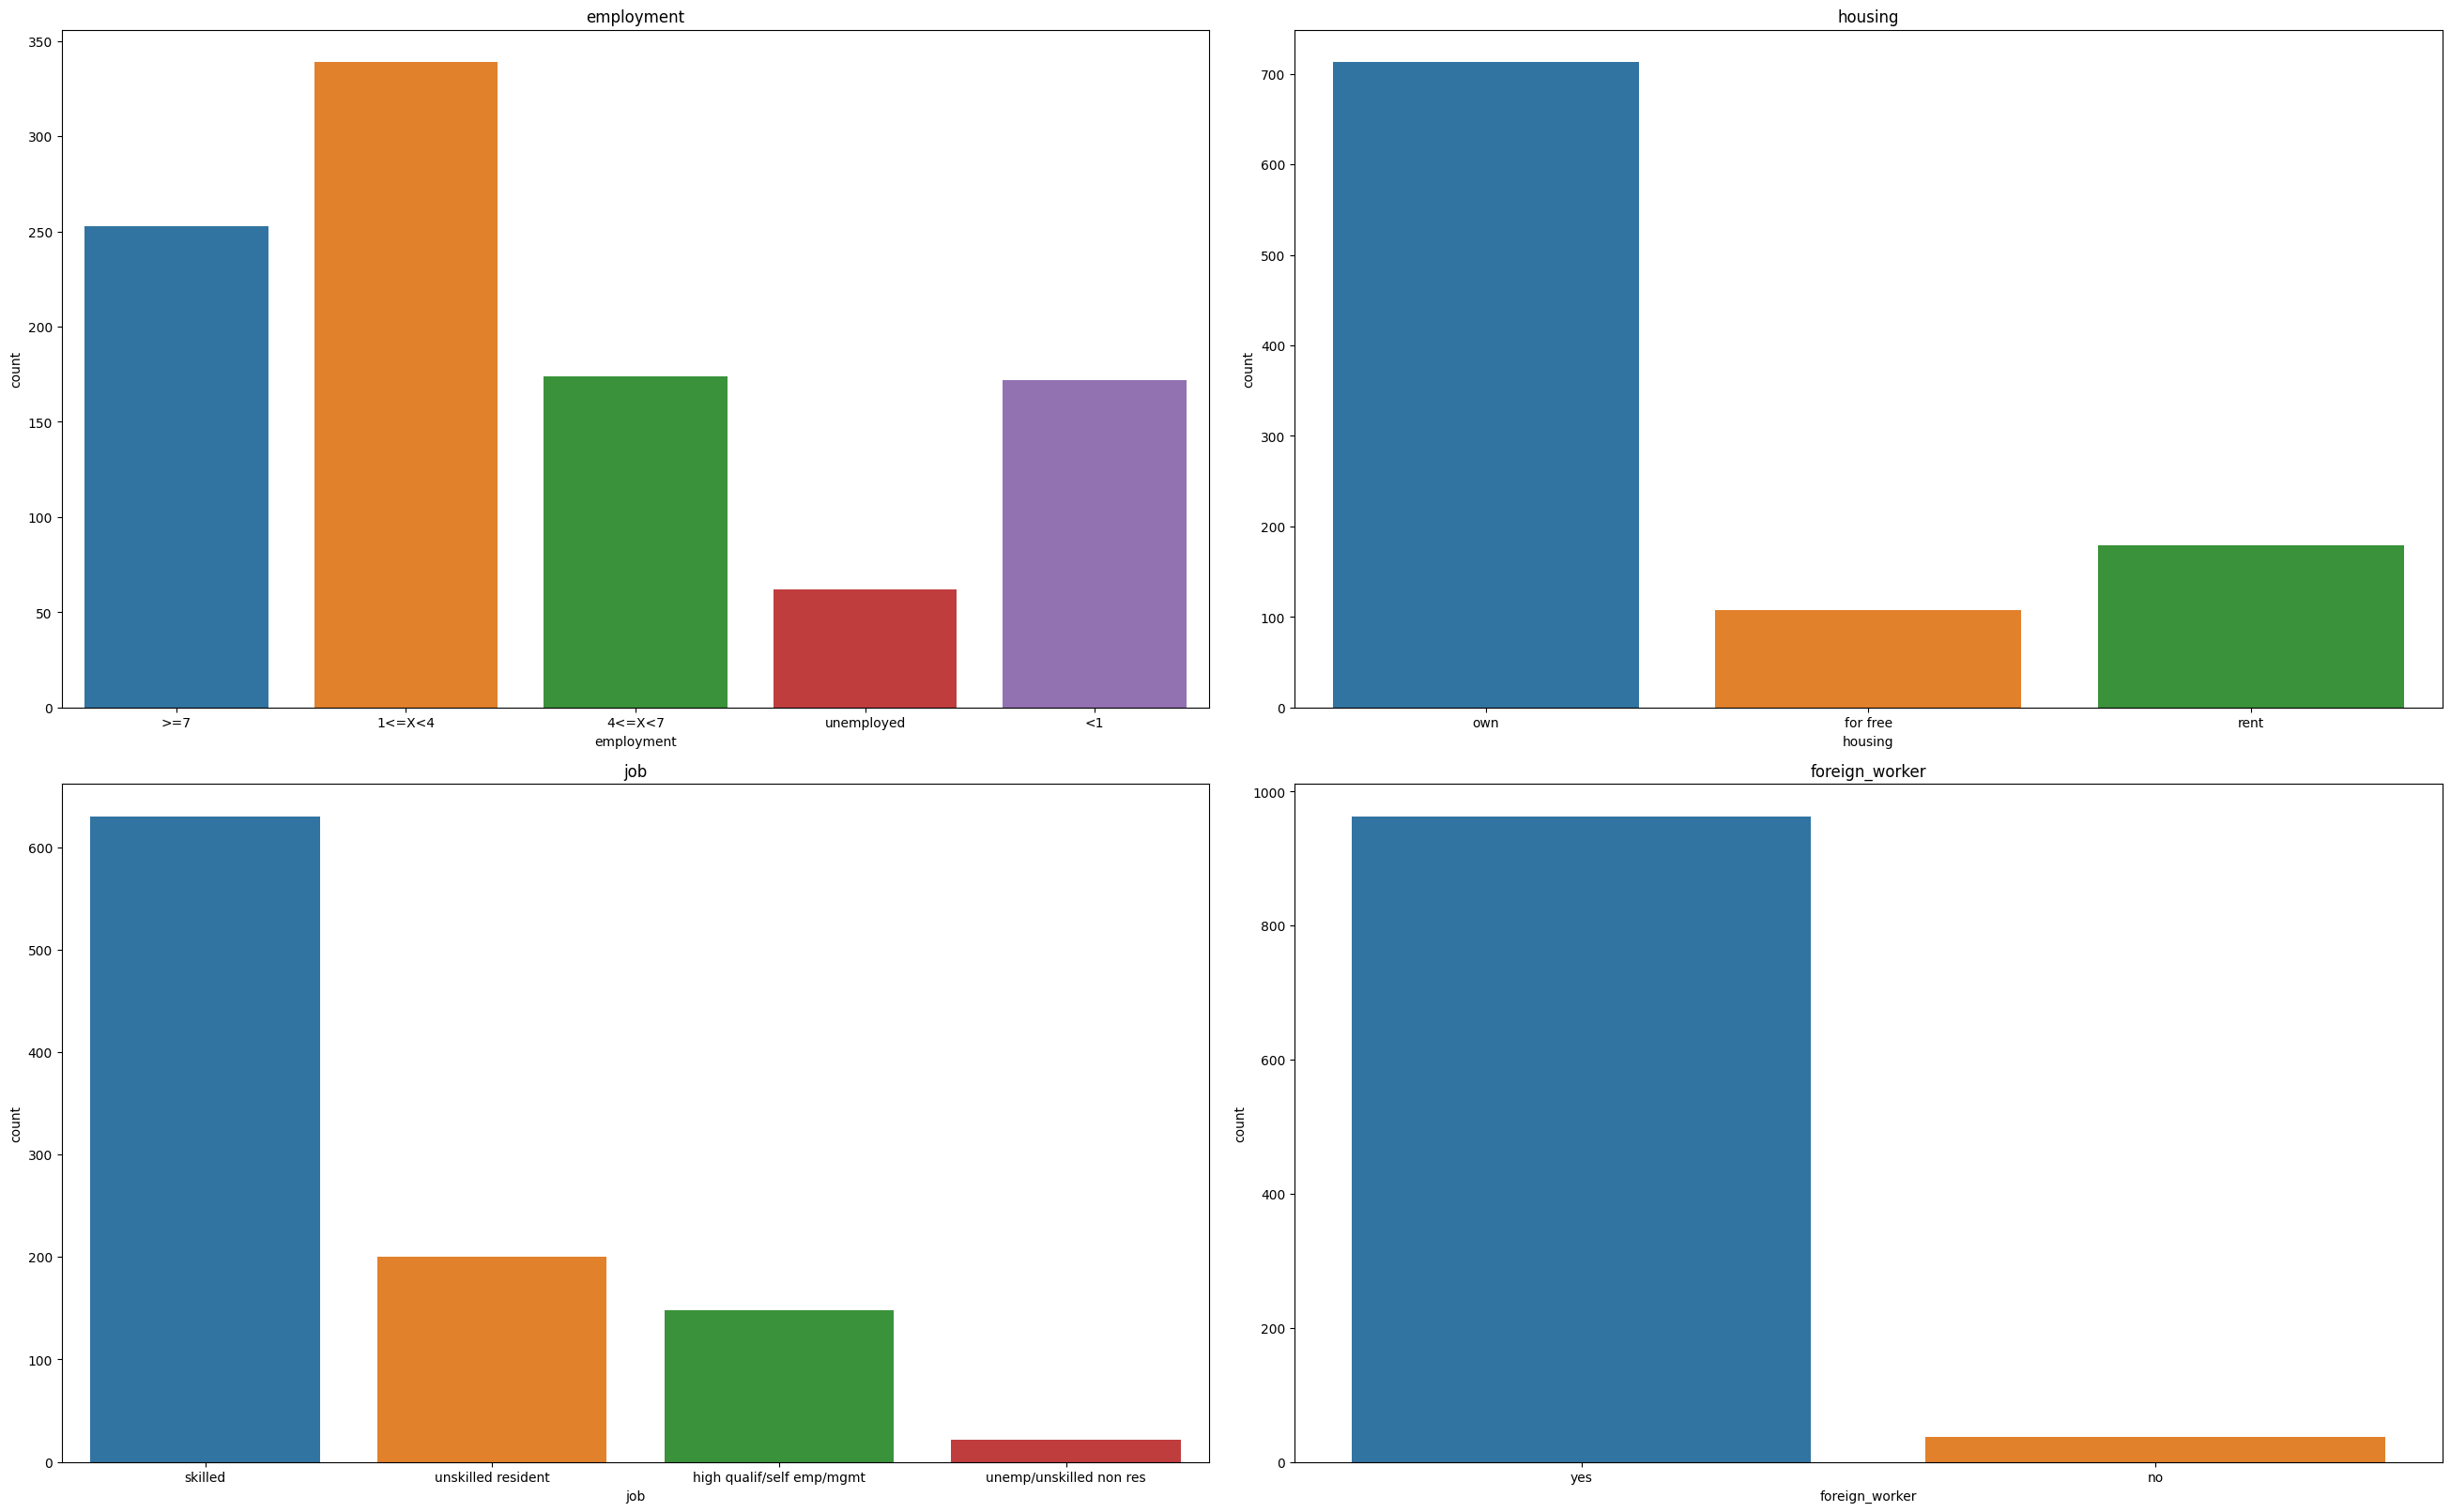

In [ ]:
plt.figure(figsize=[26,16],layout='constrained')
ind = 1
for c in ['employment', 'housing', 'job', 'foreign_worker']:
  plt.subplot(2,2,ind)
  sns.countplot(data=categ, x=c).set_title(c)
  ind += 1
plt.show()

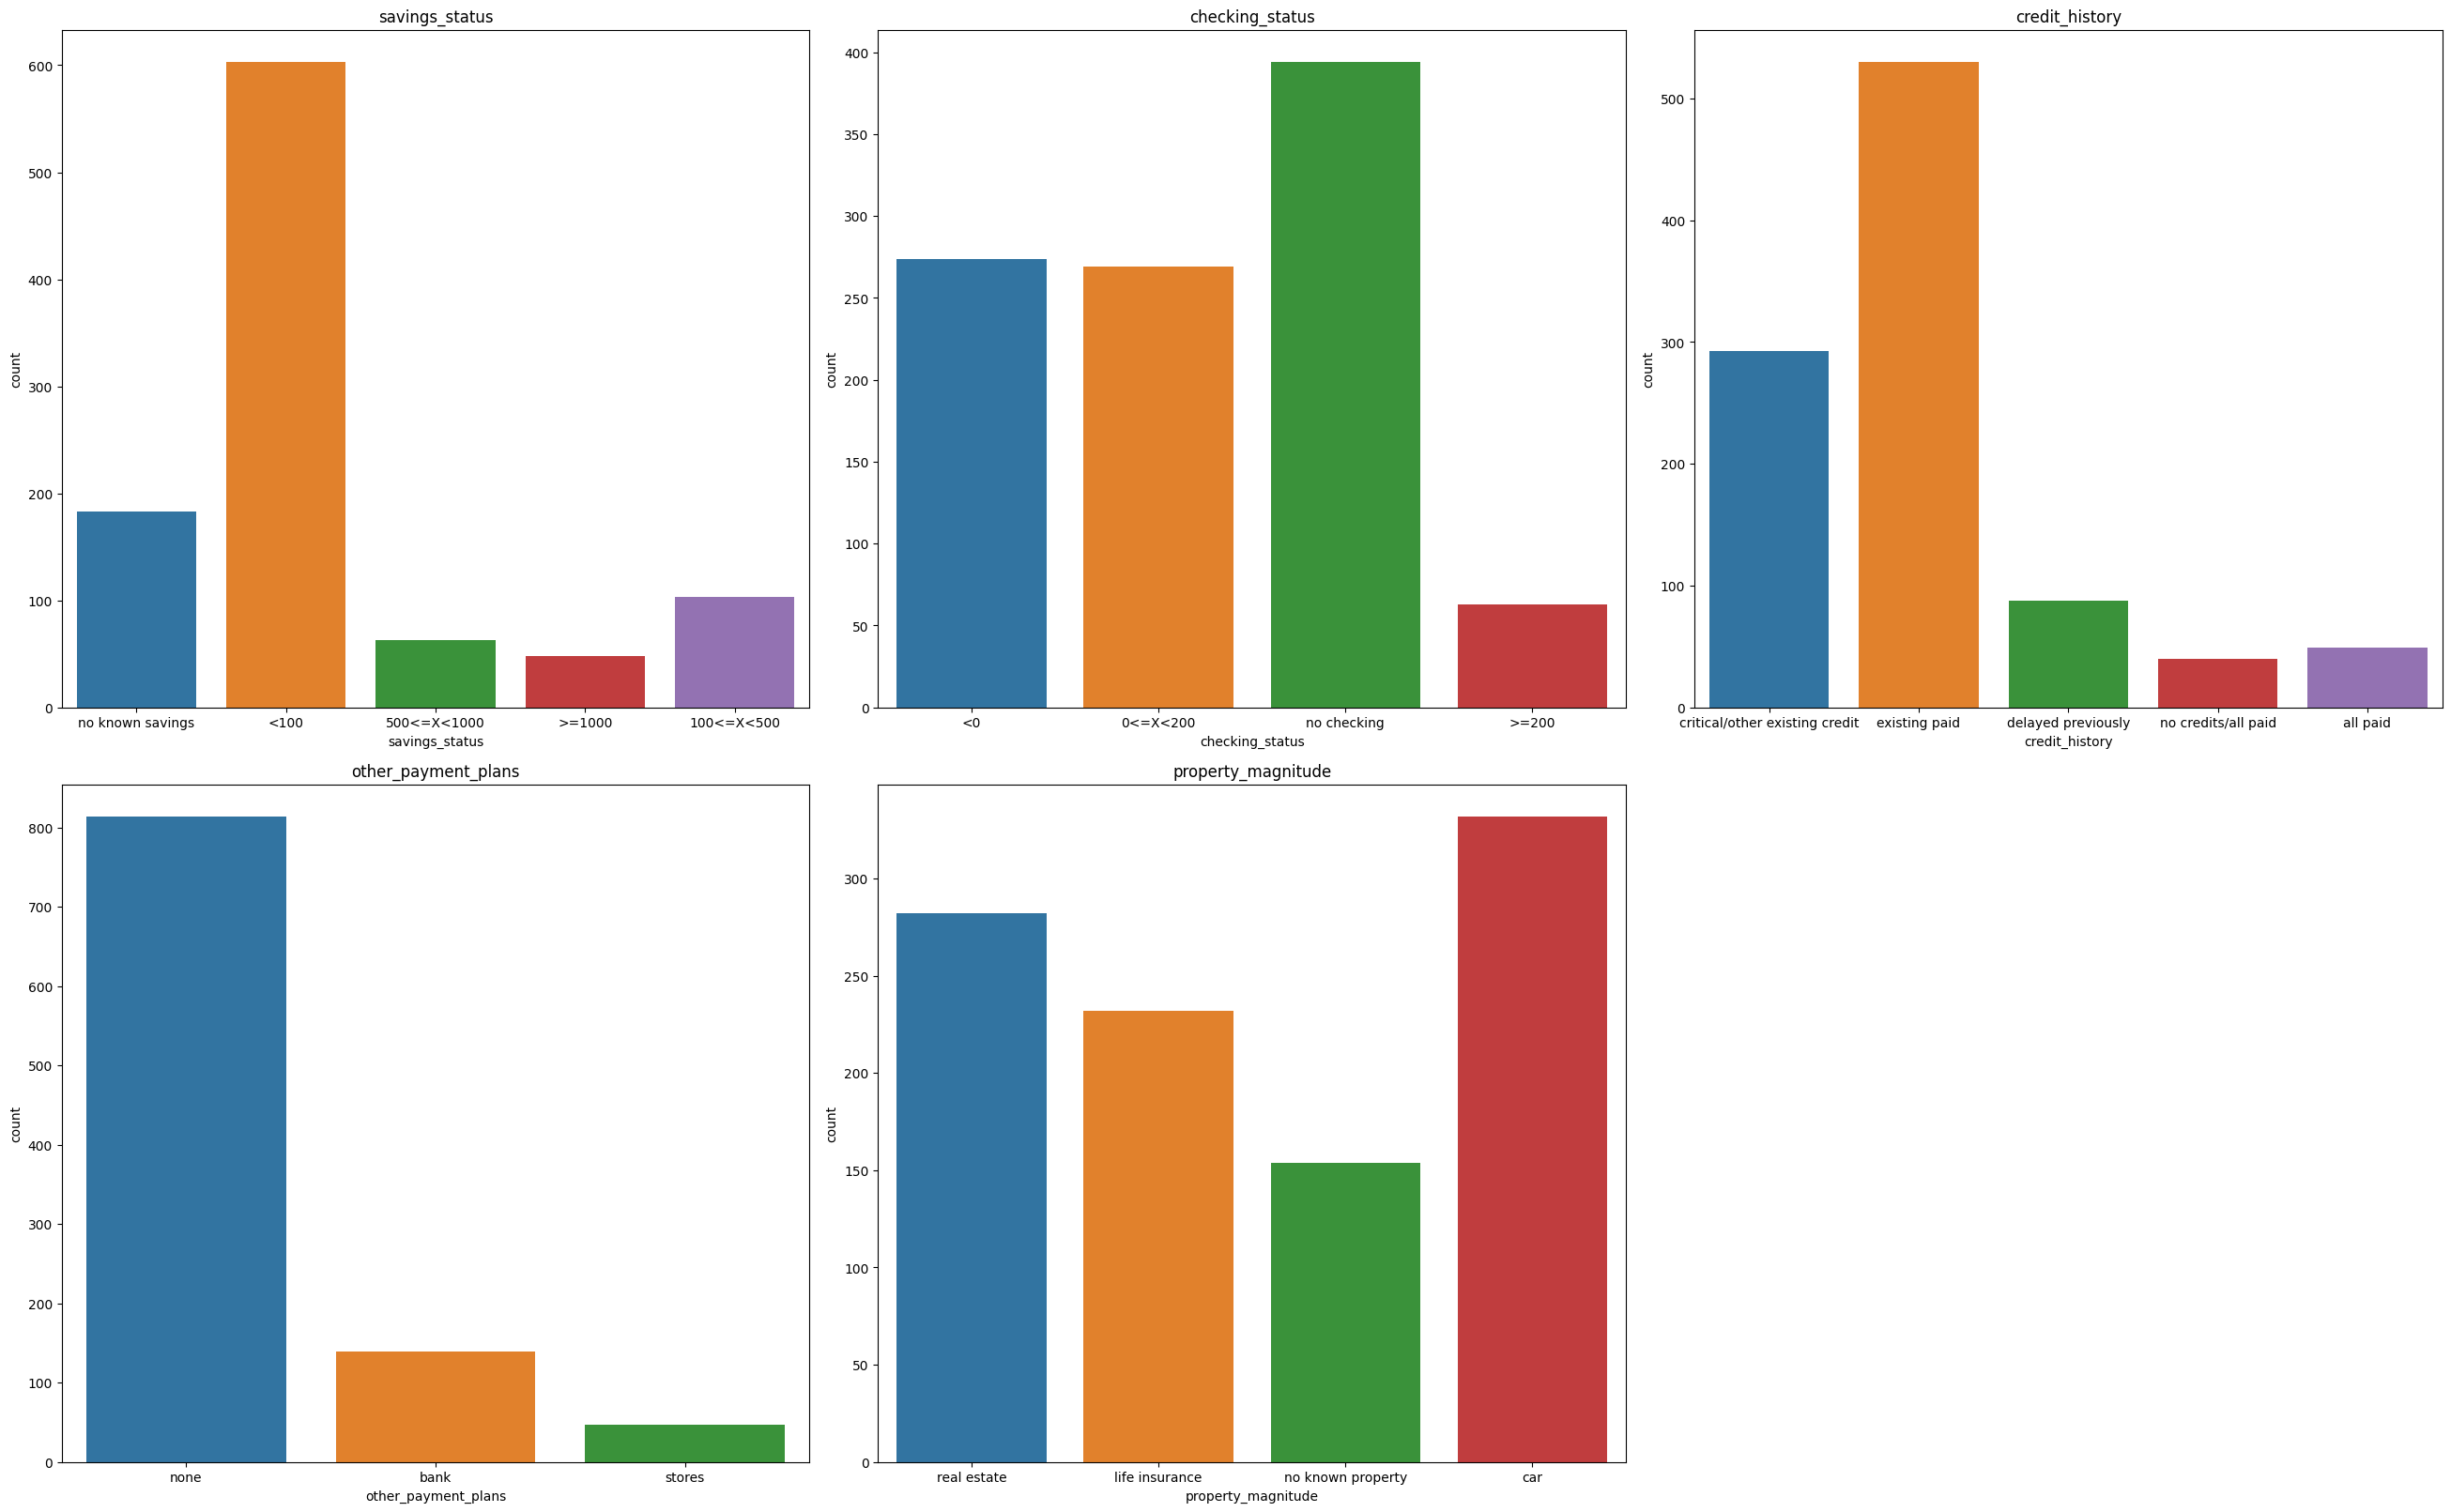

In [ ]:
plt.figure(figsize=[26,16],layout='constrained')
ind = 1
for c in ['savings_status', 'checking_status', 'credit_history', 'other_payment_plans', 'property_magnitude']:
  plt.subplot(2,3,ind)
  sns.countplot(data=categ, x=c).set_title(c)
  ind += 1
plt.show()

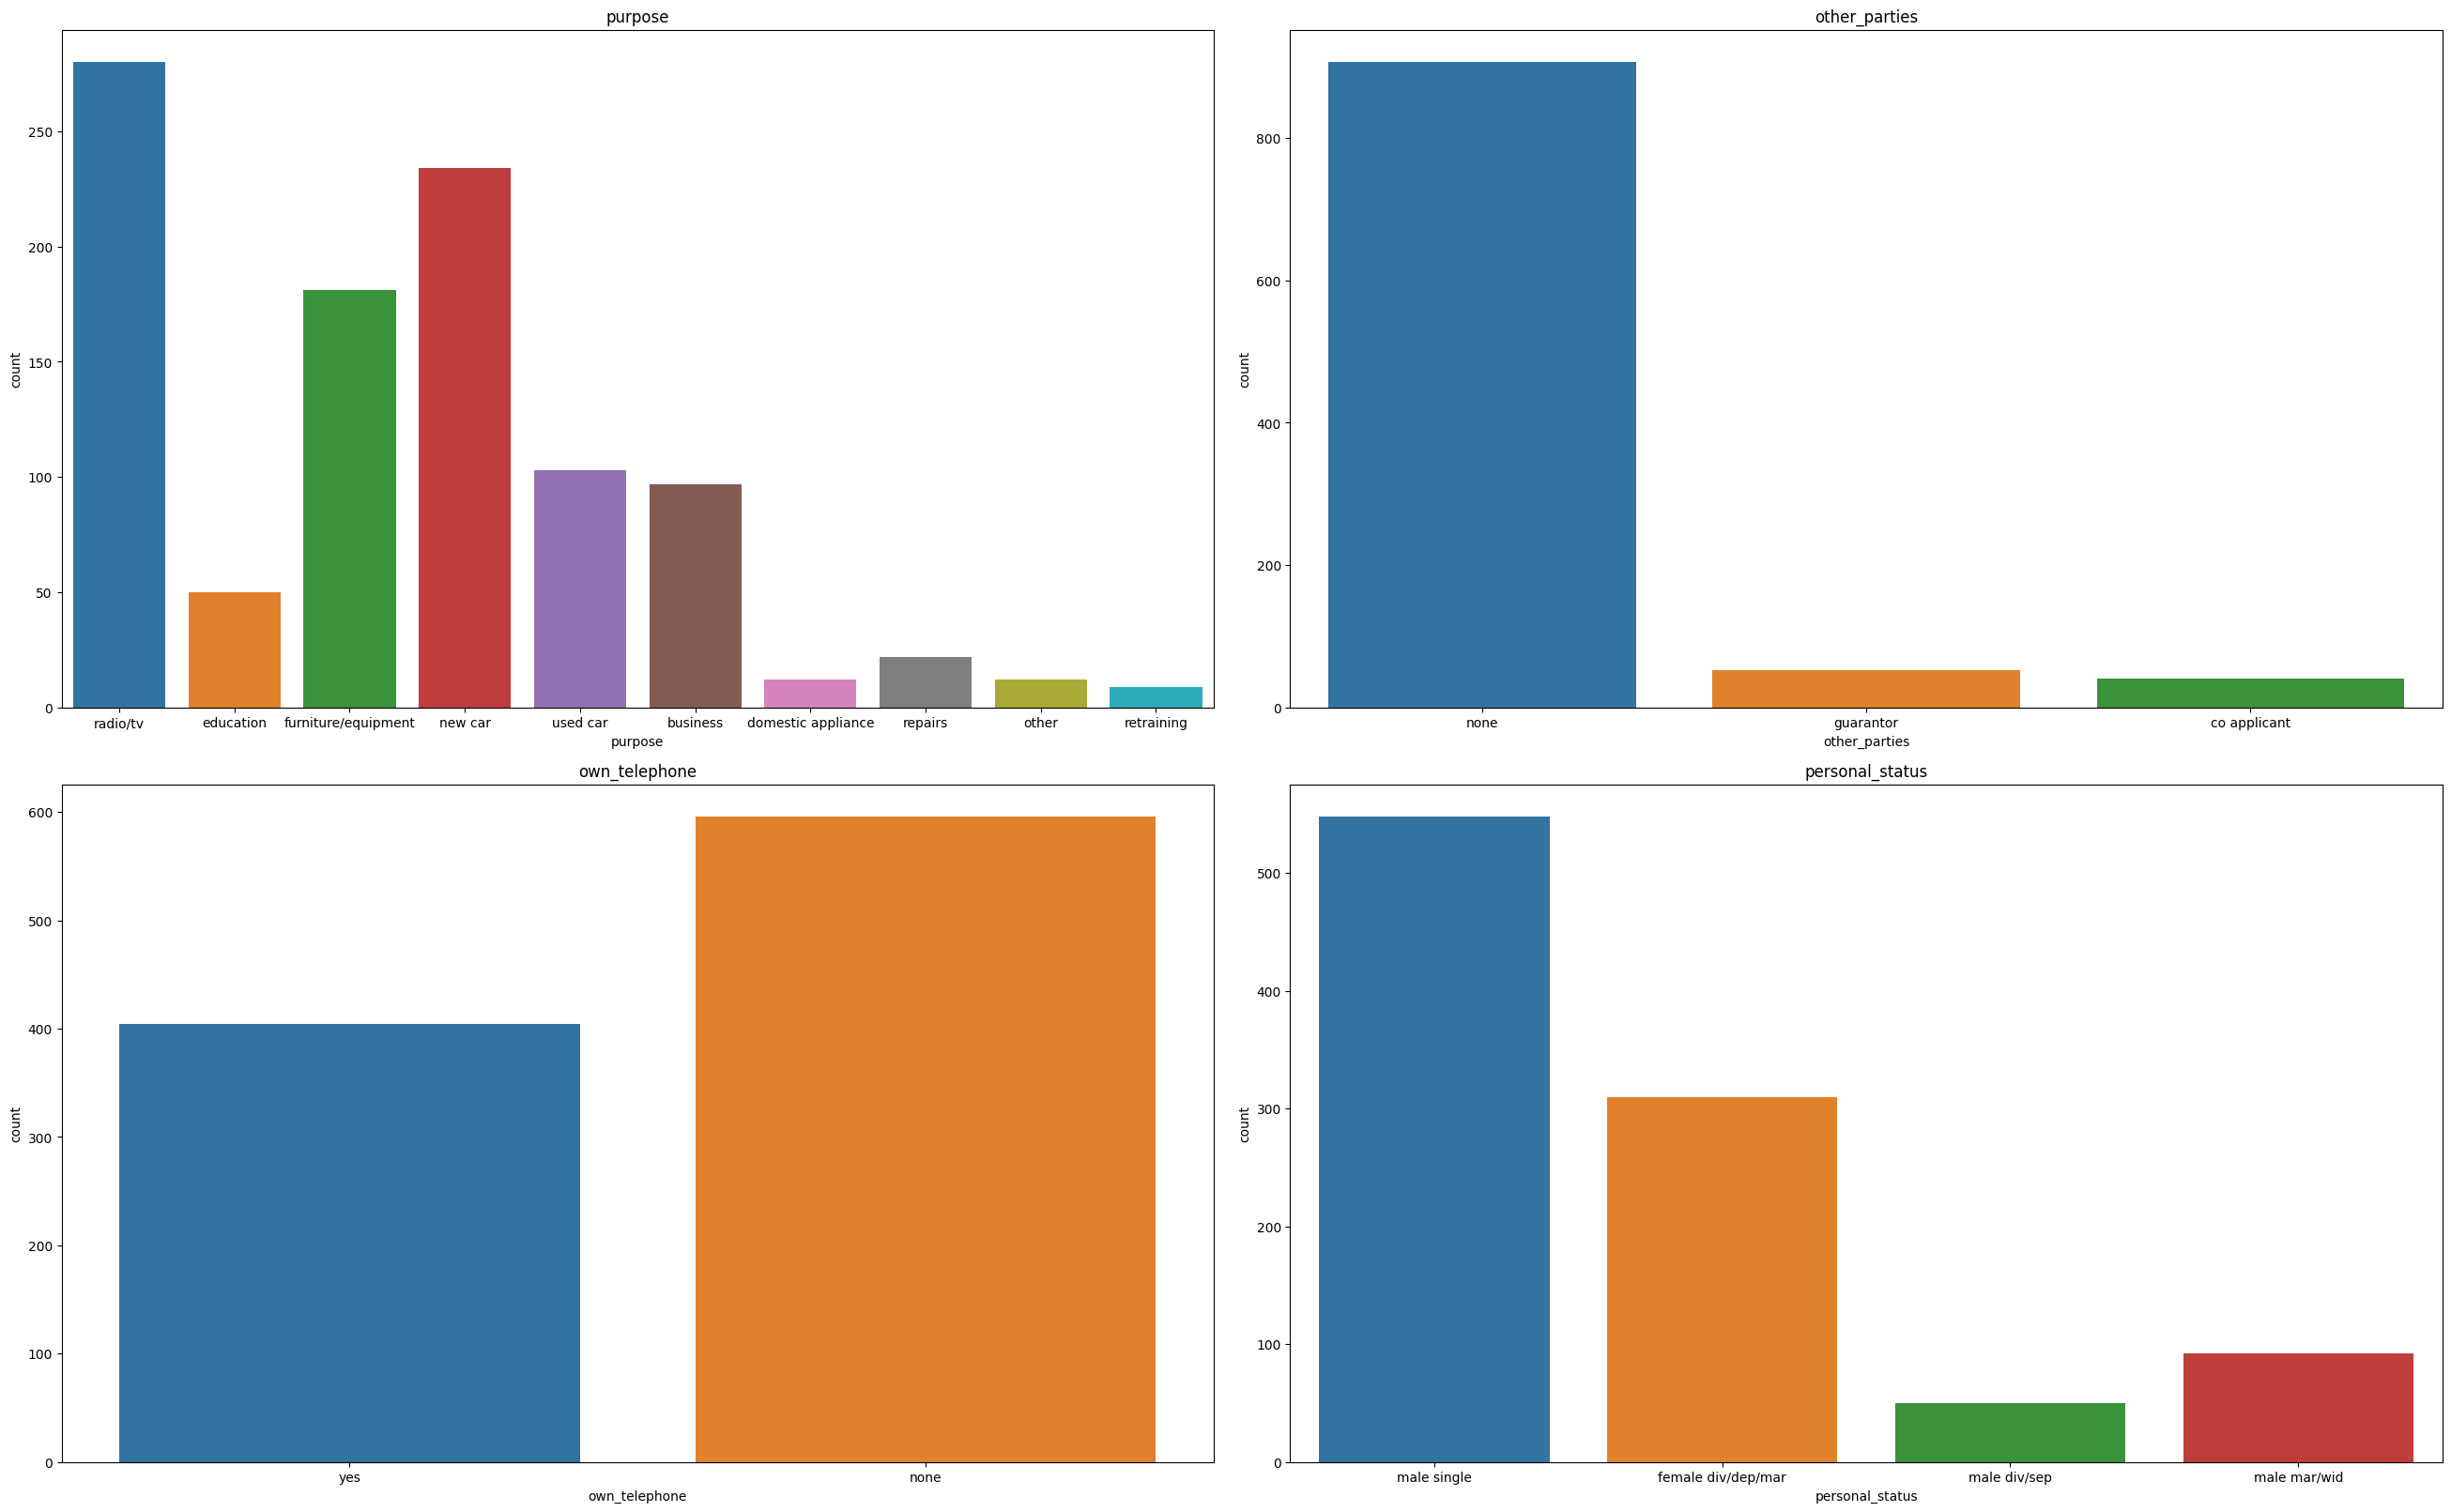

In [ ]:
plt.figure(figsize=[26,16],layout='constrained')
ind = 1
for c in ['purpose', 'other_parties', 'own_telephone', 'personal_status']:
  plt.subplot(2,2,ind)
  sns.countplot(data=categ, x=c).set_title(c)
  ind += 1
plt.show()

### **Preprocessamento**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
numeric = credit.select_dtypes(include=[np.number])

cred = pd.DataFrame(StandardScaler().fit_transform(numeric.to_numpy()),columns=numeric.columns)
cred.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


In [ ]:
for i in categ_col:
    cred[i]=LabelEncoder().fit_transform(credit[i])

cred.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,credit_history,purpose,...,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,1,6,...,3,3,2,3,1,1,1,1,1,1
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,3,6,...,0,0,2,3,1,1,1,0,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,3,1,2,...,1,3,2,3,1,1,3,0,1,1
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,3,3,...,1,3,1,1,1,0,1,0,1,1
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1,2,4,...,0,3,2,2,1,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divisão dos dados em dados de treino e teste
X = cred.drop(columns=['class']).values
y = cred.loc[:, 'class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=17)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#!pip install torch -q

import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

In [ ]:
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [ ]:
from torch import nn
from torch import optim

**Definindo primeiro modelo (Rede neural PyTorch)**

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(20, 36),
            nn.Tanh(),
            nn.Linear(36, 18),
            nn.Tanh(),
            nn.Linear(18, 1),
            nn.Sigmoid()
        )
       
    def forward(self, x):
        x = self.linear_relu_stack(x)

        return x
       
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=36, bias=True)
    (1): Tanh()
    (2): Linear(in_features=36, out_features=18, bias=True)
    (3): Tanh()
    (4): Linear(in_features=18, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
# Treinando modelo
learning_rate = 0.01

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 400
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

Training Complete


In [ ]:
import itertools

In [ ]:
y_pred = []
y_test_ = []
total = 0
correct = 0

with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs < 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test_.append(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the test instances: {100 * correct // total}%')

Accuracy of the network on the test instances: 75%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

              precision    recall  f1-score   support

         0.0       0.68      0.37      0.48        92
         1.0       0.77      0.92      0.84       208

    accuracy                           0.75       300
   macro avg       0.72      0.65      0.66       300
weighted avg       0.74      0.75      0.73       300



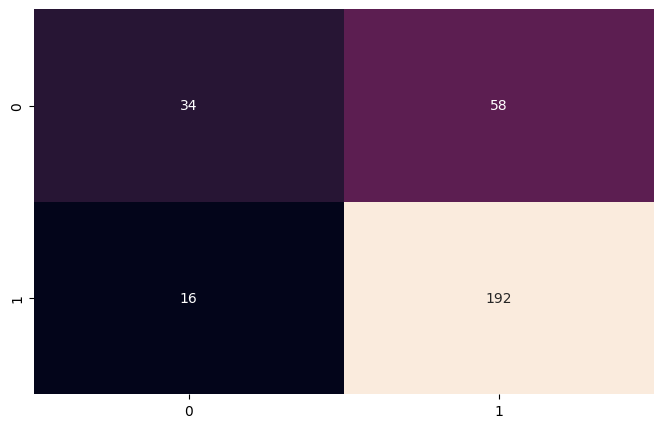

In [ ]:
y_pred = list(itertools.chain(*y_pred))
y_test_ = list(itertools.chain(*y_test_))


print(classification_report(y_test_, y_pred))



cf_matrix = confusion_matrix(y_test_, y_pred)

plt.subplots(figsize=(8, 5))

sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")

plt.show()

**Segundo Modelo (RandomForest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


Accuracy:  0.76
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.35      0.47        92
           1       0.77      0.94      0.84       208

    accuracy                           0.76       300
   macro avg       0.75      0.65      0.66       300
weighted avg       0.75      0.76      0.73       300



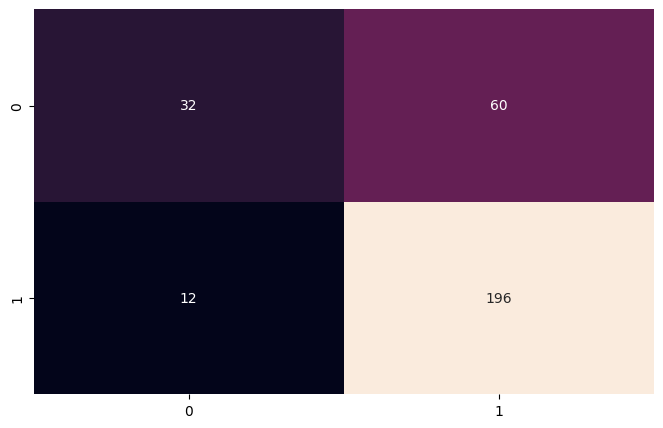

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

conf = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
clf = classification_report(y_test,y_pred)

print('Accuracy: ', acc)
print('Classification report:\n', clf)

plt.subplots(figsize=(8, 5))

sns.heatmap(conf, annot=True, cbar=False, fmt="g")

plt.show()